# Sector 6

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
data = get_output('../output_log/s6_10aug.txt')
print(len(data))
metadata = pd.read_csv('/storage/astro2/phrdhx/tesslcs/sector6lookup.csv')
print(len(metadata[metadata.Magnitude < 13]))

624281
624281


In [3]:
data = data[data.transit_prob == 'maybeTransit']
print(len(data), f"after maybeTransit, {round(len(data)/len(metadata[metadata.Magnitude < 13]),3)*100}% candidates remain")
data.head()

320635 after maybeTransit, 51.4% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
8,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,278054880,-4.65510,-4.13181,1484.05153,0.92274,0.00000,0.10201,-29.71903,0.00000,...,714,100.25656,108.65190,1.02303,1.10869,0.00027,0.00028,0.00021,0.00023,maybeTransit
13,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,100478849,-3.78989,-3.38022,1475.05562,1.11948,0.00015,0.31838,-30.00000,58.28823,...,288,42.18725,34.13187,1.11019,0.89821,0.00015,0.00015,0.00013,0.00012,maybeTransit
14,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,12035548,-4.89894,-2.82741,1475.34948,1.00367,0.00122,0.84509,2.37384,5.54696,...,304,66.65315,66.41977,0.98019,0.97676,0.00084,0.00084,0.00066,0.00066,maybeTransit
15,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,88928405,-0.57053,-0.24776,1470.45416,1.12006,0.00033,0.12967,30.00000,765.74275,...,69,109.62522,97.87521,1.76815,1.57863,0.00052,0.00049,0.00042,0.00038,maybeTransit
16,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,206883134,-4.72413,-3.80332,1476.72487,1.19802,0.00018,0.08249,30.00000,2256.82400,...,370,8.83170,7.31350,0.33968,0.28129,0.00054,0.00050,0.00034,0.00032,maybeTransit


## Removing worst anomalies

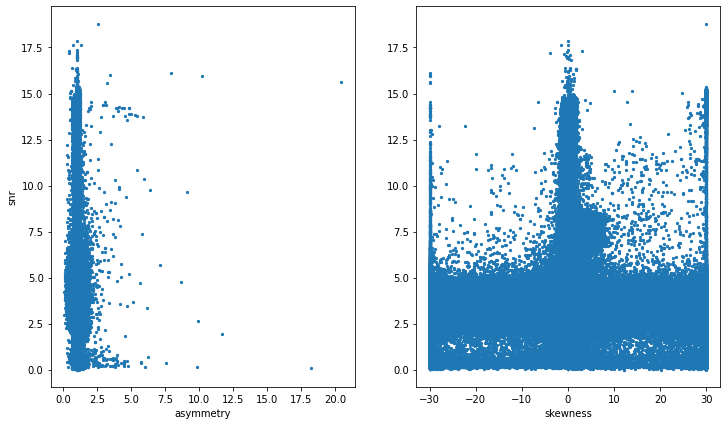

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [5]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)
data.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,278054880,-4.65510,-4.13181,1484.05153,0.92274,0.00000,0.10201,-29.71903,0.00000,...,714,100.25656,108.65190,1.02303,1.10869,0.00027,0.00028,0.00021,0.00023,maybeTransit
1,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,100478849,-3.78989,-3.38022,1475.05562,1.11948,0.00015,0.31838,-30.00000,58.28823,...,288,42.18725,34.13187,1.11019,0.89821,0.00015,0.00015,0.00013,0.00012,maybeTransit
2,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,12035548,-4.89894,-2.82741,1475.34948,1.00367,0.00122,0.84509,2.37384,5.54696,...,304,66.65315,66.41977,0.98019,0.97676,0.00084,0.00084,0.00066,0.00066,maybeTransit
3,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,88928405,-0.57053,-0.24776,1470.45416,1.12006,0.00033,0.12967,30.00000,765.74275,...,69,109.62522,97.87521,1.76815,1.57863,0.00052,0.00049,0.00042,0.00038,maybeTransit
4,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,206883134,-4.72413,-3.80332,1476.72487,1.19802,0.00018,0.08249,30.00000,2256.82400,...,370,8.83170,7.31350,0.33968,0.28129,0.00054,0.00050,0.00034,0.00032,maybeTransit


### Distribution of Asymmetry vs SNR, and Skewness vs SNR

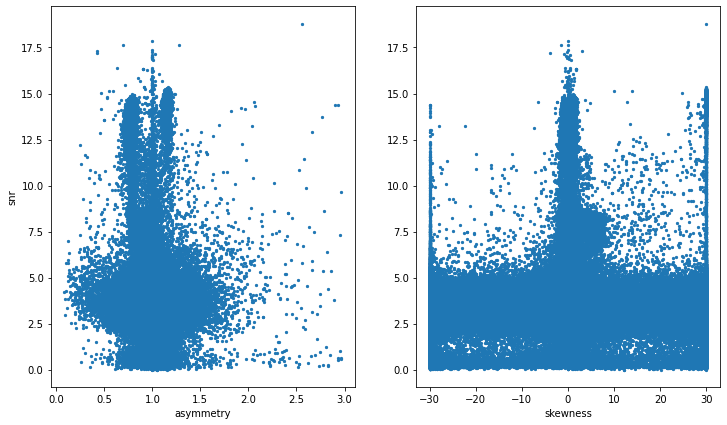

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

#### Histogram of time and duration

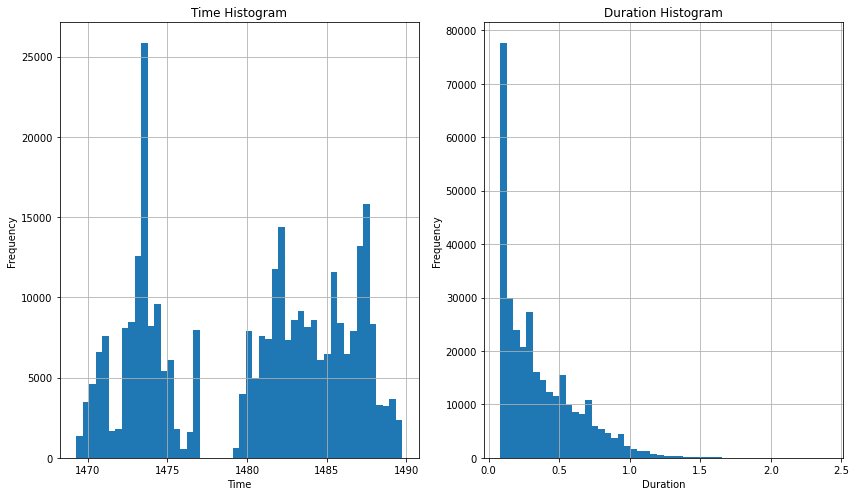

In [7]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

#### 2D Histogram of time and duration

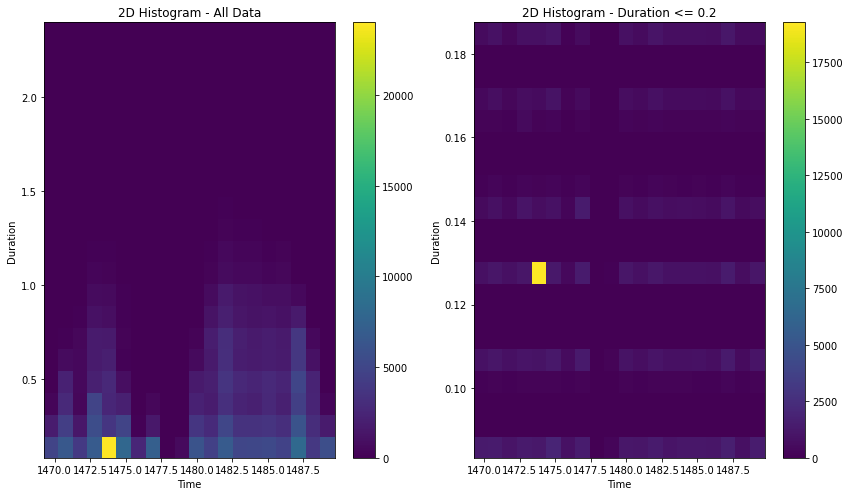

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first hist2d on the first subplot
h1 = ax1.hist2d(data['time'], data['duration'], bins=[20, 20])
ax1.set_title('2D Histogram - All Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Duration')
plt.colorbar(h1[3], ax=ax1)

# Plot the second hist2d on the second subplot
filtered_data = data[data.duration <= 0.2]
h2 = ax2.hist2d(filtered_data['time'], filtered_data['duration'], bins=[20, 20])
ax2.set_title('2D Histogram - Duration <= 0.2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Duration')
plt.colorbar(h2[3], ax=ax2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Alternative visualisation

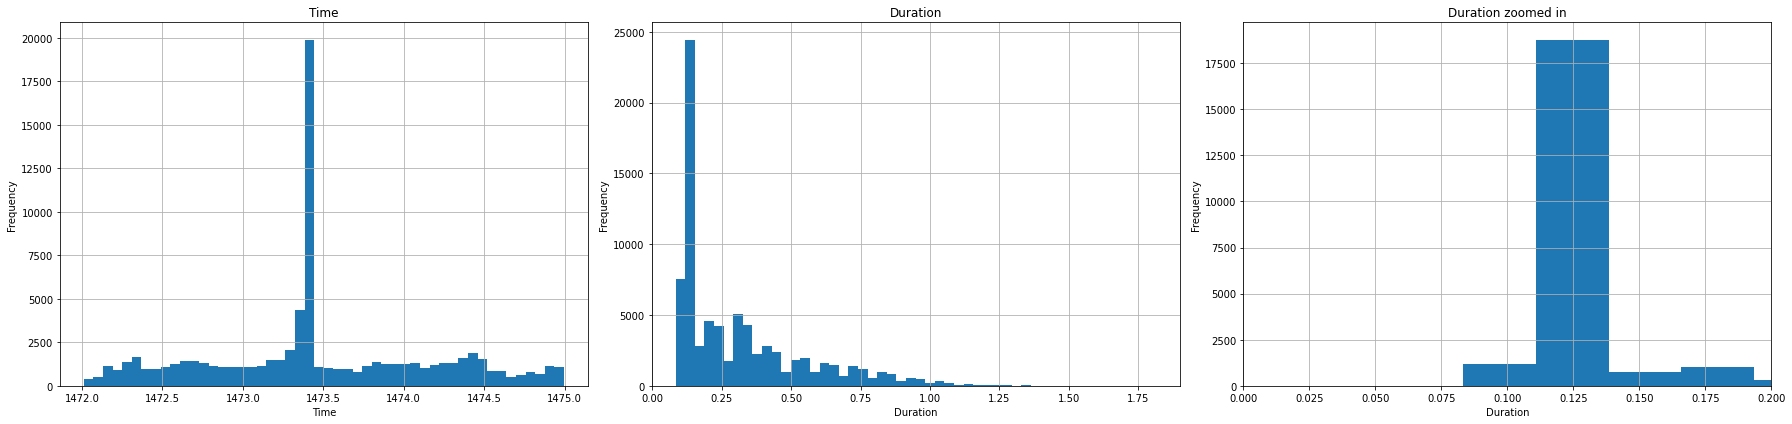

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,6))

# Plot the first histogram on the first subplot
data.loc[(data.time >= 1472) & (data.time <= 1475)].hist('time', bins=50, ax=ax1)
ax1.set_title('Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')

# Plot the second histogram on the second subplot
data.loc[(data.time >= 1472) & (data.time <= 1475)].hist('duration', bins=50, ax=ax2)
ax2.set_title('Duration')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Frequency')

data.loc[(data.time >=1473) & (data.time <= 1473.5)].hist('duration',bins=50,ax=ax3)
ax3.set_title('Duration zoomed in')
ax3.set_xlabel('Duration')
ax3.set_ylabel('Frequency')
ax3.set_xlim([0,0.2])

plt.tight_layout()
plt.show()

There is a second spike around 0.3 days... Proven in `asym_score vs depth` plots

In [11]:
data.drop(data[(data['duration'] <= 0.15) & (data['time'] >= 1473.433) & (data['time'] <= 1473.5)].index,inplace=True)

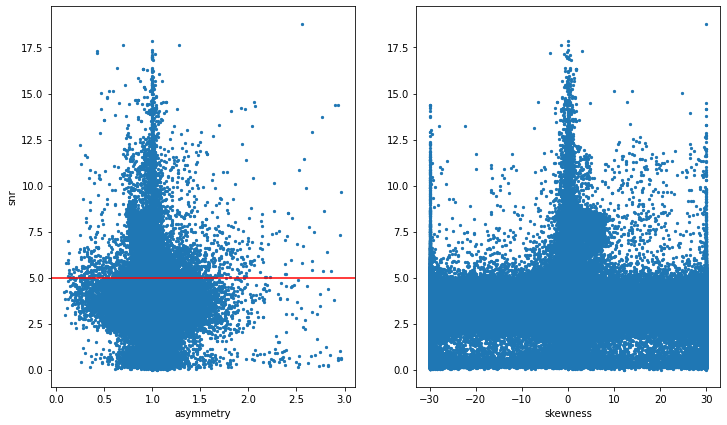

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
ax[0].axhline(5,c='red')

plt.show()

---

## SNR cut

In [13]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)

In [15]:
len(data_new[data_new.asym_score <= 0.2])

13

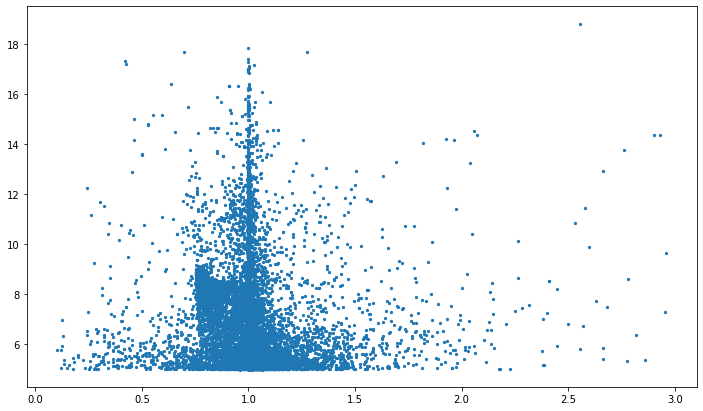

In [16]:
plt.scatter(data_new['asym_score'],abs(data_new.snr),s=5)

---
## Other property cuts

### Import EB catalogue

In [17]:
ebs = pd.read_csv('../eb_cat.txt')
tois = pd.read_csv('../exofop_tess_tois.csv')

tois = tois.reset_index()
tois = tois['level_0'][1:]
tois = tois.values.astype(int)



In [18]:
data_new

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,438420993,-21.29779,-5.95484,1481.51659,0.99993,0.00201,0.22436,0.39725,4.00481,...,600,336.17455,336.08791,1.68087,1.68044,0.00083,0.00083,0.00070,0.00070,maybeTransit
1,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,88931471,-22.27667,-7.95337,1473.32917,0.83135,0.03468,0.32383,5.21265,1.86541,...,207,342718.95232,256596.85230,3497.13217,2618.33523,0.01836,0.02014,0.01051,0.01139,maybeTransit
2,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,206883877,-12.57130,-5.84132,1485.14154,1.06445,0.00154,0.07575,1.64714,0.51667,...,774,22.25644,20.57218,0.58570,0.54137,0.00073,0.00070,0.00058,0.00058,maybeTransit
3,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,172459926,-6.11935,-5.82588,1486.11877,1.06860,0.00016,0.03992,29.99999,9953.98576,...,821,18.00081,16.70235,0.90004,0.83512,0.00085,0.00082,0.00055,0.00054,maybeTransit
4,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,278683641,-17.65082,-7.89874,1473.26174,0.99892,0.01783,0.04696,-0.00536,6265.00884,...,196,22725.17474,22700.53321,598.03091,597.38245,0.00481,0.00481,0.00261,0.00260,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13889,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,48880672,-9.89948,-5.00385,1485.07743,1.42762,0.00043,0.28696,-21.52988,18.39911,...,771,145.03193,97.98421,2.58986,1.74972,0.00034,0.00028,0.00024,0.00021,maybeTransit
13890,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,49008186,-12.22104,-5.05091,1482.49439,1.05027,0.00221,0.07498,-1.01780,0.32636,...,647,187.78890,179.75863,4.26793,4.08542,0.00048,0.00046,0.00040,0.00038,maybeTransit
13891,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,49703429,-8.04213,-5.21091,1476.72304,1.06858,0.00021,0.29411,-4.39099,4.24845,...,370,65.97320,62.22744,0.63436,0.59834,0.00014,0.00013,0.00010,0.00009,maybeTransit
13892,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,50722475,-12.70038,-8.22517,1480.12017,1.04917,0.00016,0.07401,2.57170,1.36004,...,533,61.58177,58.69635,1.62057,1.54464,0.00019,0.00018,0.00014,0.00014,maybeTransit


In [19]:
ebs_found = data_new[data_new['TIC_ID'].isin(ebs['ID'])]
tois_found =  data_new[data_new['TIC_ID'].isin(tois)]

In [20]:
# Step 1: Create a boolean mask
data_new['is_eb'] = data_new['TIC_ID'].isin(ebs['ID'])
data_new['is_toi'] = data_new['TIC_ID'].isin(tois)

In [21]:
log_peak_power = np.log10(data_new['peak_lspower'])
log_depth = np.log10(abs(data_new['depth']))

In [22]:
len(data_new)

13894

### Duration vs depth

In [23]:
frac_dur = data_new.duration[(data_new.is_eb == False) & (data_new.is_toi == False)]
frac_depth = data_new.depth[(data_new.is_eb == False) & (data_new.is_toi == False)]

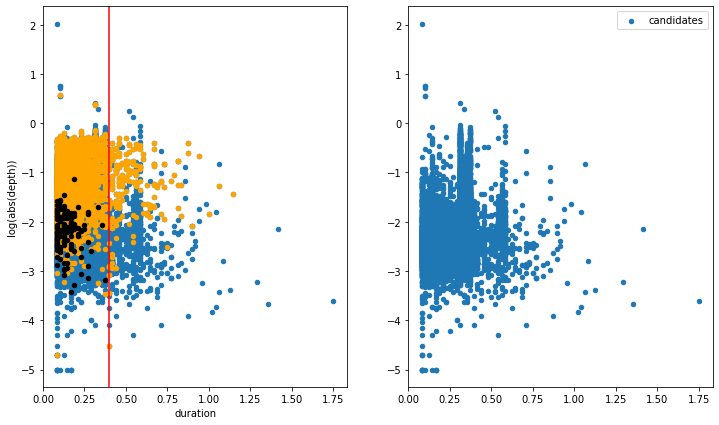

In [24]:
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(data_new.duration,log_depth,s=20,label='candidates',zorder=1)
ax[0].scatter(ebs_found.duration,np.log10(abs(ebs_found['depth'])),c='orange',s=20,label='ebs')
ax[0].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')

ax[1].scatter(frac_dur,np.log10(abs(frac_depth)),s=20,label='candidates',zorder=1)
#ax[1].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')



ax[0].set_xlabel('duration')
ax[0].set_ylabel('log(abs(depth))')
ax[0].axvline(0.4,c='red')

plt.legend()

### Duration vs Peak_lspower

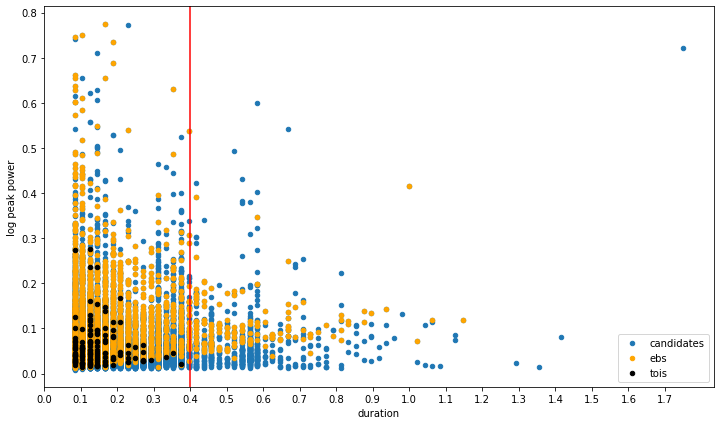

In [25]:
plt.scatter(data_new.duration,data_new.peak_lspower,s=20,label='candidates')
plt.scatter(ebs_found.duration,ebs_found.peak_lspower,c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,tois_found.peak_lspower,c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

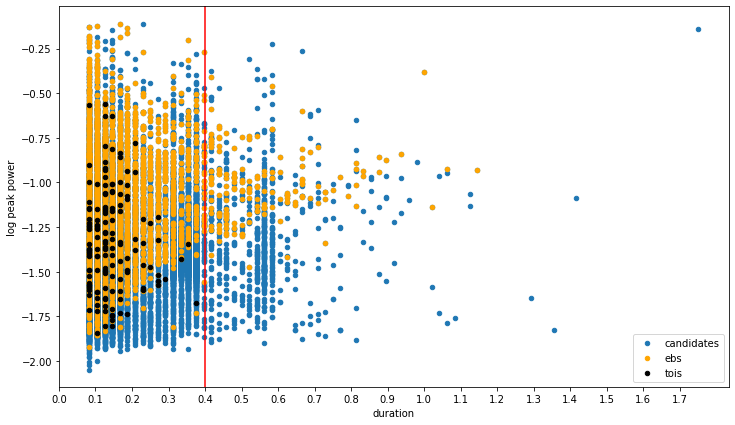

In [26]:
plt.scatter(data_new.duration,log_peak_power,s=20,label='candidates')
plt.scatter(ebs_found.duration,np.log10(ebs_found['peak_lspower']),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,np.log10(tois_found['peak_lspower']),c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

In [27]:
crossref_tot = (ebs_found.duration) + (tois_found.duration) / data_new.duration
crosref_ebs = (ebs_found.duration) / data_new.duration
cross_ref_toi = (tois_found.duration) / data_new.duration

### duration vs SNR

Text(0, 0.5, 'snr')

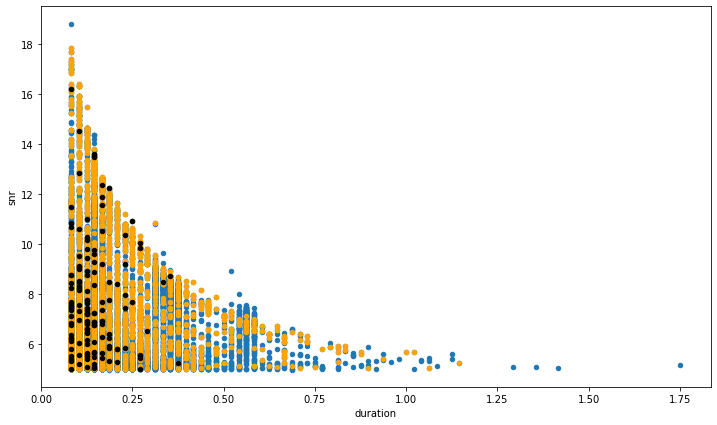

In [28]:
plt.scatter(data_new.duration,abs(data_new.snr),s=20,label='candidates')
plt.scatter(ebs_found.duration,abs(ebs_found.snr),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,abs(tois_found.snr),c='black',s=20,label='tois')
plt.xlabel('duration')
plt.ylabel('snr')

### asymmetry vs depth

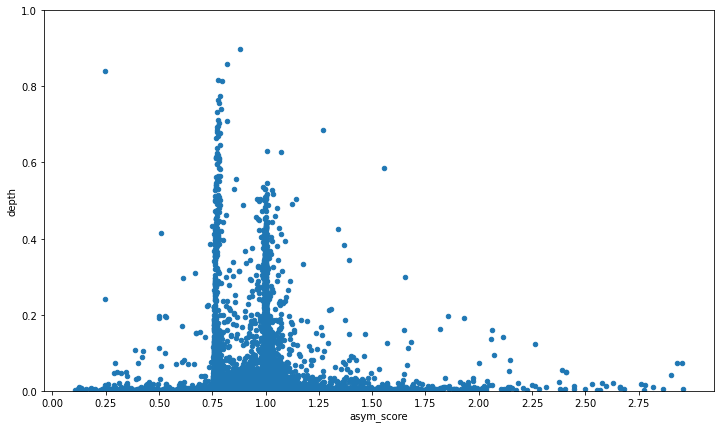

In [29]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates')
plt.ylim([0,1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.show()

In [30]:
test = data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)]

#### Explore spike at ~0.8

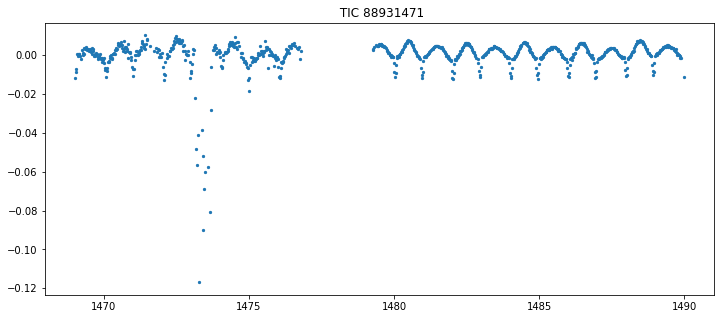

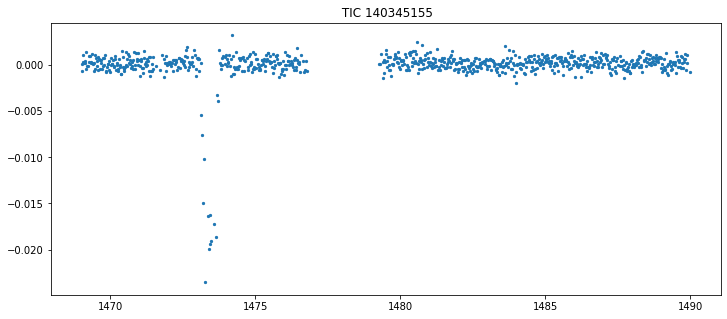

In [31]:
for i in data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)].path.head(2): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Spike at `asym_score ~ 1`

Expected. But nevertheless, let's see

759


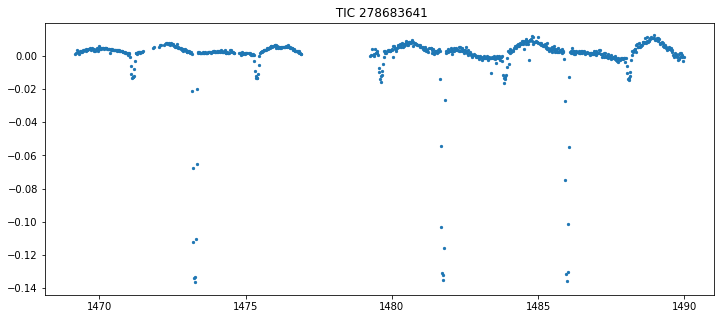

759


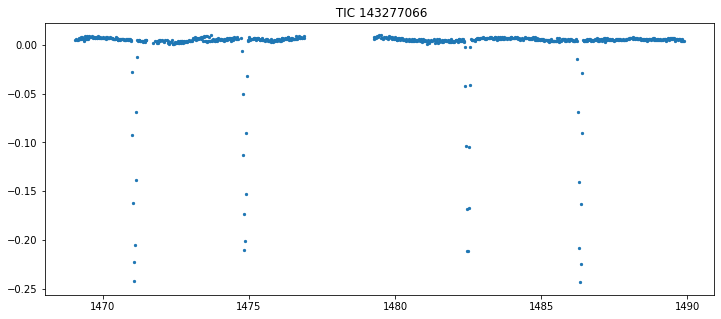

In [32]:
for i in data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)].path.head(2): #4 x 4 grid for illustration purposes
    print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Make cut on 0.4 day duration

In [33]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

In [34]:
data_new.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi
0,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,438420993,-21.29779,-5.95484,1481.51659,0.99993,0.00201,0.22436,0.39725,4.00481,...,336.08791,1.68087,1.68044,0.00083,0.00083,0.00070,0.00070,maybeTransit,False,False
18,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,247640968,-16.52171,-6.97615,1473.41250,1.00234,0.00290,0.34606,8.16874,4.53395,...,929.26998,7.24117,5.88146,0.00184,0.00184,0.00108,0.00112,maybeTransit,False,False
54,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,247671894,-8.39633,-5.63968,1473.39161,0.92400,0.00055,0.24118,4.28276,3.21458,...,128.78135,0.90343,0.84725,0.00053,0.00056,0.00042,0.00042,maybeTransit,False,False
58,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,278825448,-14.31272,-5.25604,1480.90780,1.00140,0.00095,0.31827,-1.08365,1.03528,...,188.85467,0.91816,0.91677,0.00035,0.00035,0.00026,0.00026,maybeTransit,False,False
63,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,438464023,-29.08146,-7.29567,1486.03743,0.99998,0.05244,0.16701,0.34391,1.00038,...,20365.13304,159.15605,159.10260,0.00480,0.00480,0.00384,0.00384,maybeTransit,True,False


### asym_score vs depth
depth spike at 0.3 days gone. 
- Most if not all the failed lightcurves should have been cut now.

In [35]:
from matplotlib.colors import ListedColormap

In [36]:
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

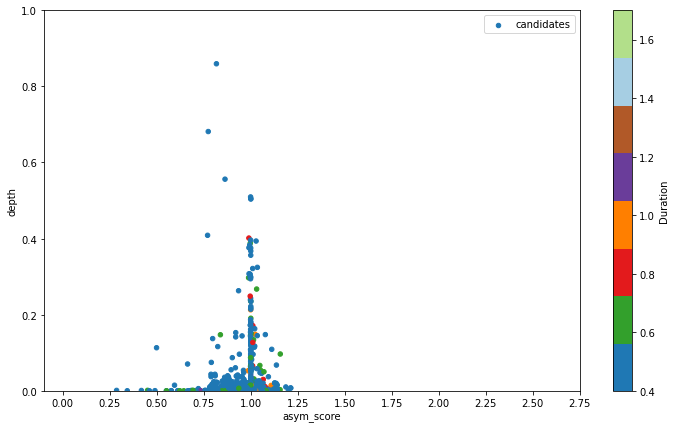

In [44]:
bin_interval = 0.1
bins = np.arange(0, np.max(data_new.duration) + bin_interval, bin_interval)

# Use np.digitize to map duration values to their corresponding bins
duration_binned = bins[np.digitize(data_new.duration, bins) - 1]


plt.scatter(data_new.asym_score,abs(data_new.depth),c=duration_binned,s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,1])
plt.xlim([-0.1,2])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f915e44bc50>]],
      dtype=object)

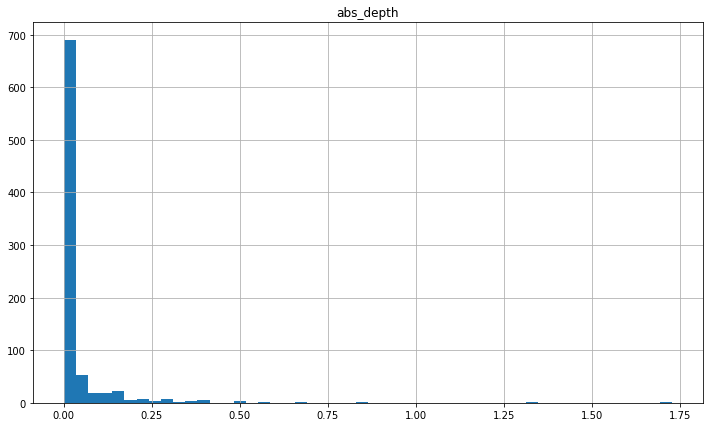

In [38]:
data_new['abs_depth'] = abs(data_new.depth)
data_new.hist('abs_depth',bins=50)

Most are low amplitude transits

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f915f03cfd0>]],
      dtype=object)

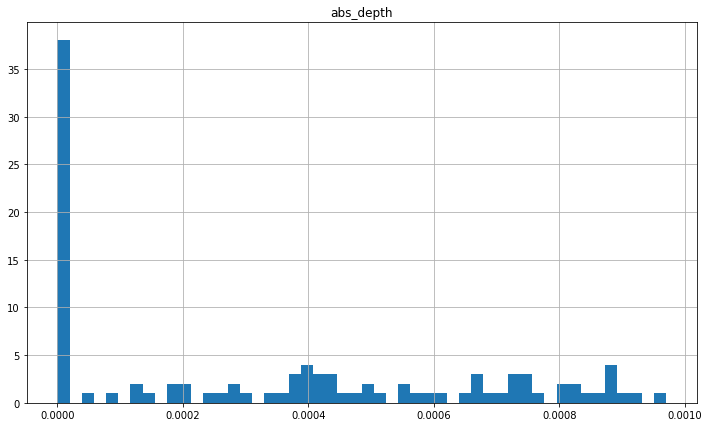

In [41]:
data_new[data_new.abs_depth <= 0.001].hist('abs_depth',bins=50)

In [42]:
data_new[data_new.abs_depth <= 0.001]

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi,abs_depth
77,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,7493260,-5.14878,-5.00282,1473.13823,1.00638,0.00014,0.70607,25.79304,1.196067e+02,...,0.84540,0.84218,0.00029,0.00029,0.00023,0.00023,maybeTransit,False,False,0.00015
139,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,279050909,-8.90104,-5.12699,1480.99127,0.72213,0.00000,9.31259,29.99795,5.088180e+09,...,1.10787,1.51796,0.00034,0.00040,0.00028,0.00032,maybeTransit,False,False,0.00000
168,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,143334937,-10.22882,-5.17042,1474.72384,0.77227,0.00009,0.57908,-18.95415,2.547973e+02,...,0.88959,1.15822,0.00059,0.00067,0.00046,0.00051,maybeTransit,False,False,0.00012
206,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,264593157,-5.26397,-5.00010,1474.49543,0.95824,0.00005,0.09991,29.07750,3.181189e+03,...,0.98157,1.02939,0.00052,0.00053,0.00041,0.00040,maybeTransit,False,False,0.00043
300,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,143381157,-4.00317,-5.11962,1473.93208,1.00162,0.00197,6.93335,-5.39195,1.185012e+01,...,0.63431,0.63329,0.00041,0.00041,0.00030,0.00029,maybeTransit,False,False,0.00021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_12...,52277263,-6.32649,-5.43530,1480.43068,0.89347,0.00000,0.00000,30.00000,0.000000e+00,...,0.42308,0.47465,0.00129,0.00137,0.00097,0.00103,maybeTransit,False,False,0.00000
13288,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_12...,52290341,-7.87437,-5.77035,1473.45413,0.86396,0.00000,6.14151,28.69808,0.000000e+00,...,4.46778,5.49623,0.00063,0.00068,0.00049,0.00049,maybeTransit,False,False,0.00000
13573,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,100775163,-5.93903,-5.03910,1473.16004,1.06213,0.00020,0.40179,30.00000,6.693155e+01,...,0.86853,0.81756,0.00024,0.00023,0.00019,0.00018,maybeTransit,False,False,0.00040
13601,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,150321162,-10.63549,-5.44781,1480.88638,0.99983,0.00050,0.23068,0.00368,6.425177e+04,...,2.53739,2.53698,0.00030,0.00030,0.00023,0.00023,maybeTransit,False,False,0.00086


In [40]:
for i in data_new[data_new.asym_score <= 0.01].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
    #plt.figure(figsize=(12,5))
    #plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    #plt.title(f' TIC {lc_info[0]}')
    #plt.show()

### Make cut at `> 0.1` and `< 0` depth

In [47]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

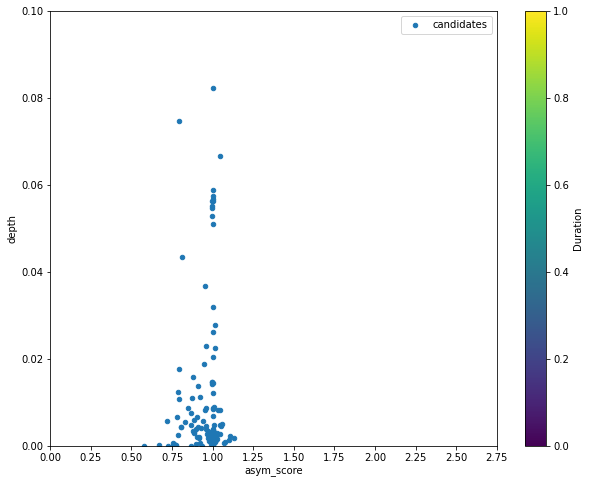

In [49]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,0.1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

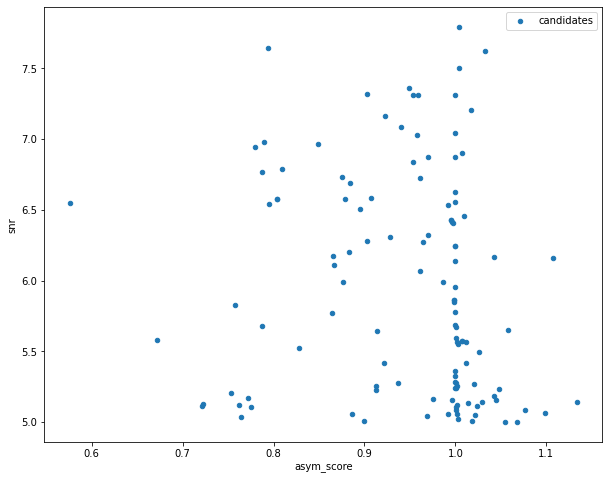

In [50]:
plt.scatter(data_new.asym_score,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('asym_score')
plt.ylabel('snr')
plt.legend()
plt.show()

- 0.1 == 10% depth
- 0.01 == 1% depth
- 0.001 == 0.1% depth

### SNR vs depth

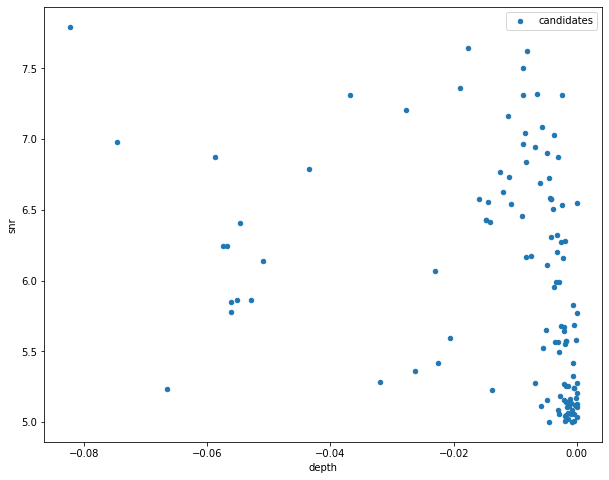

In [51]:
plt.scatter(data_new.depth,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('depth')
plt.ylabel('snr')
plt.legend()
plt.show()

## Make SOM Cutouts

In [77]:
os.getcwd()

'/home/astro/phrdhx/automated_exocomet_hunt/scripts'

In [78]:
os.chdir('../')
for i in data_new.path:
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',som_cutouts=True)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)